              Coefficients
Temps             0.171202
Surface           0.008788
Habitat_CpPl     -0.283355
Habitat_CpUt     -1.546312
Habitat_EspV     -0.029457
Habitat_EvEx      1.859123


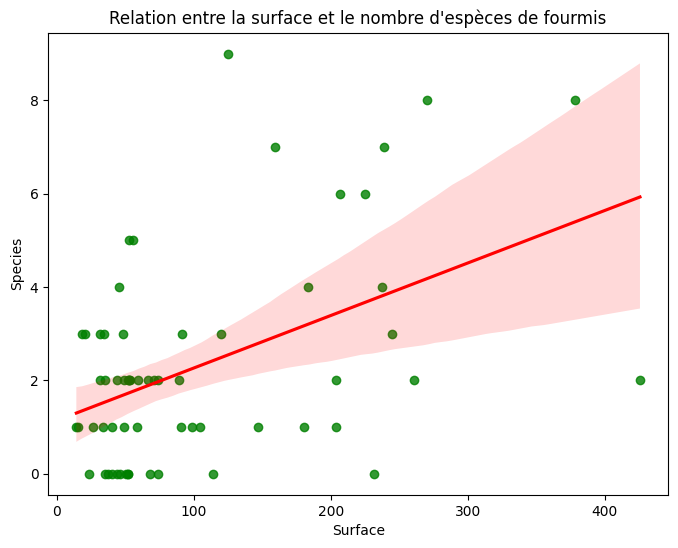

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Charger les données
df = pd.read_excel('TDP.xlsx')

# Encodage de la variable catégorielle "habitat" (transforme les catégories en variables binaires)
habitat_column_name = 'Habitat'
# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for pandas compatibility

# Fit the encoder to the 'Habitat' column and transform it
habitat_encoded = encoder.fit_transform(df[[habitat_column_name]])

# Create a DataFrame from the encoded data
habitat_df = pd.DataFrame(habitat_encoded, columns=encoder.get_feature_names_out([habitat_column_name]))

# Concatenate the encoded habitat data with the original DataFrame
df = pd.concat([df, habitat_df], axis=1)




X = df[['Temps', 'Surface'] + list(habitat_df.columns)]  # Replace with actual column names if needed

# Alternative: Use .loc[] for more robust column selection
#X = df.loc[:, ['temps', 'surface'] + list(habitat_df.columns)]

y = df['Species']

# Régression linéaire multiple
model = LinearRegression()
model.fit(X, y)

# Affichage des coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
print(coefficients)

# Prédiction et évaluation du modèle
y_pred = model.predict(X)

# Visualisation de l'effet de l'habitat sur SpeciesF
plt.figure(figsize=(8,6))
sns.regplot(x='Surface', y='Species', data=df, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('Relation entre la surface et le nombre d\'espèces de fourmis')
plt.show()



Statistiques descriptives:
               Age  Nb arbres    Occ_Nat     Occ_Ag    Occ_Ugs     Occ_eq  \
count    62.000000  62.000000  60.000000  60.000000  60.000000  60.000000   
mean   2022.112903   2.354839   0.152350   0.052867   0.032233   0.168367   
std       0.748875   2.483366   0.098764   0.087371   0.020645   0.119720   
min    2021.000000   0.000000   0.000000   0.000000   0.008000   0.025000   
25%    2022.000000   1.000000   0.078000   0.000000   0.011000   0.065000   
50%    2022.000000   2.000000   0.127000   0.002500   0.023500   0.134000   
75%    2023.000000   3.000000   0.234000   0.058000   0.051000   0.257000   
max    2023.000000  13.000000   0.315000   0.352000   0.084000   0.382000   

         Occ_Tud    Occ_Tuc      P_Nat       P_Ag  ...       Limon  \
count  60.000000  60.000000  60.000000  60.000000  ...   62.000000   
mean    0.535350   0.059133   3.066667   1.650000  ...  248.464516   
std     0.128897   0.040300   1.448163   1.695707  ...   62.257393   

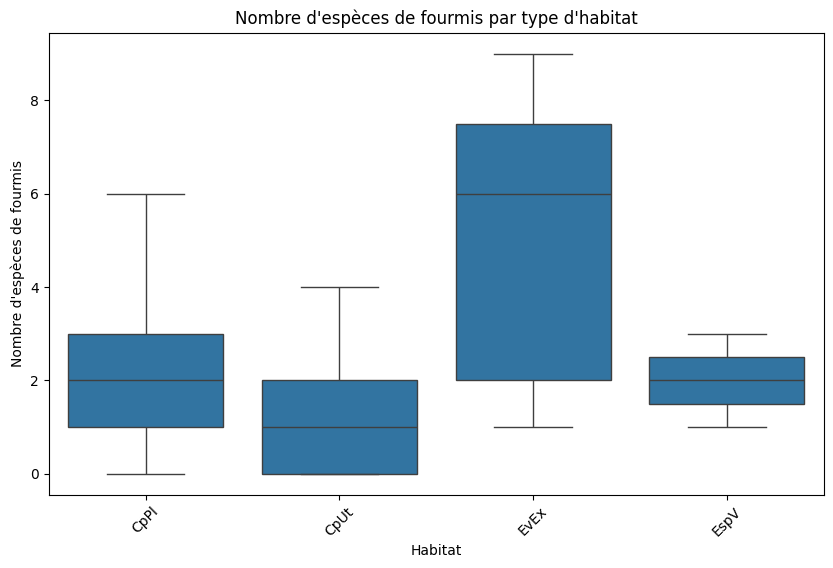

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_excel('TDP.xlsx')

# Affichage des statistiques descriptives
stats_desc = df.describe()
print("Statistiques descriptives:")
print(stats_desc)


# Boxplot pour visualiser la distribution de 'Species' par habitat
plt.figure(figsize=(10, 6))
sns.boxplot(x='Habitat', y='Species', data=df)
plt.title('Nombre d\'espèces de fourmis par type d\'habitat')
plt.xlabel('Habitat')
plt.ylabel('Nombre d\'espèces de fourmis')
plt.xticks(rotation=45)
plt.show()
